# Field of View

In [5]:
import math

# tello stats
H = height = 1936 # pixels
W = width = 2592 # pixels
FOV_diagnol = math.radians(82.6) # degrees to radians
D = diagnol = math.sqrt(H**2 + W**2)
FOV_horizontal = math.atan(math.tan(FOV_diagnol/2) * W / D)**2 # radians
FOV_vertical = 2 * math.atan(math.tan(FOV_horizontal/2) * W / H) # radians
print('Diagnol FOV (degrees):', math.degrees(FOV_diagnol))
print('Horizonal FOV (degrees):', math.degrees(FOV_horizontal))
print('Vertical FOV (degrees):', math.degrees(FOV_vertical))

Diagnol FOV (degrees): 82.60000000000001
Horizonal FOV (degrees): 21.551822670919492
Vertical FOV (degrees): 28.59115845728329


In [21]:
f = desired_forward_step_size = 5 # meters
eps_f = max_error_forward = 0.5 # meters
eps_d = max_error_downward = 0.5 # meters
c = collision_tollerance = 0.5 # meters from drone.get_position() below drone that will cause a collision
theta = FOV_vertical_half = FOV_vertical / 2 # radians
n = n_previous_frames = 2 # number frames to look back 
d = desired_downward_step_size = n*(f-eps_f)*math.tan(theta) - eps_d - c
print('Downward Step Size must be <', d, 'meters')

Downward Step Size must be < 1.293331717510676 meters


# NEURAL NETWORK EXPERIMENTATION

In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import math
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
def angle_diff(a1, a2):
    #return a1 - a2
    #return abs(a1 - a2)
    #return a1 - a2 - math.pi
    #return abs(a1 - a2) - math.pi
    return math.pi - abs(abs(a1 - a2) - math.pi)

In [3]:
print(
    int(round(np.degrees(angle_diff(np.radians(90), np.radians(180))),0)),
    int(round(np.degrees(angle_diff(np.radians(-160),np.radians(-40))),0)),
    int(round(np.degrees(angle_diff(np.radians(90), np.radians(-120))),0)),
    int(round(np.degrees(angle_diff(np.radians(-90), np.radians(150))),0)),
)

90 120 150 120


In [4]:
n_train = 1000
n_test = 100
n_features = 2
n_output = 2
max_iters = 10000

In [5]:
X_train = np.random.rand(n_train, n_features)*2*math.pi - math.pi
print(X_train.shape, X_train.min(), X_train.max())

(1000, 2) -3.137622600837204 3.1394808625658177


In [6]:
X_test = np.random.rand(n_test, n_features)*2*math.pi - math.pi
print(X_test.shape, X_test.min(), X_test.max())

(100, 2) -3.1320323652997617 3.0367574977859704


In [7]:
def get_labels(X):
    Y = np.zeros((X.shape[0], n_output))
    for n in range(X.shape[0]):
        diff = angle_diff(X[n, 0], X[n, 1])
        if diff  < 1:
            Y[n] = [1, 0]
        else:
            Y[n] = [0, 1]
    print(Y.shape, Y.min(), Y.max())
    return Y
Y_train = get_labels(X_train)
Y_test = get_labels(X_test)

(1000, 2) 0.0 1.0
(100, 2) 0.0 1.0


0.92 0.93


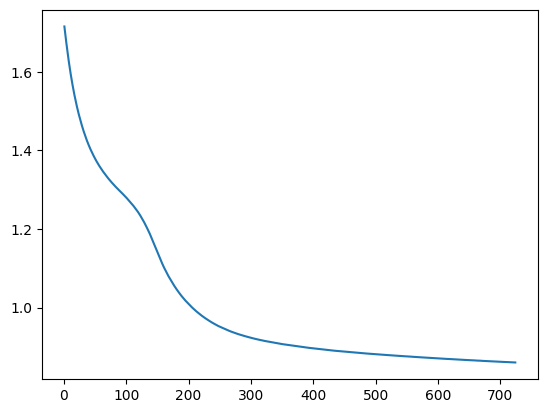

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=max_iters, early_stopping=False)
mlp.fit(X_train, Y_train)
P_train = mlp.predict(X_train)
P_test = mlp.predict(X_test)
print(accuracy_score(P_train, Y_train), accuracy_score(P_test, Y_test))
iters = [i+1 for i in range(len(mlp.loss_curve_))]
plt.plot(iters, mlp.loss_curve_)

(1000, 1) 0.003760024359801939 3.1414227365337206
(100, 1) 0.021988614426438957 3.100635200028117
0.994 0.98


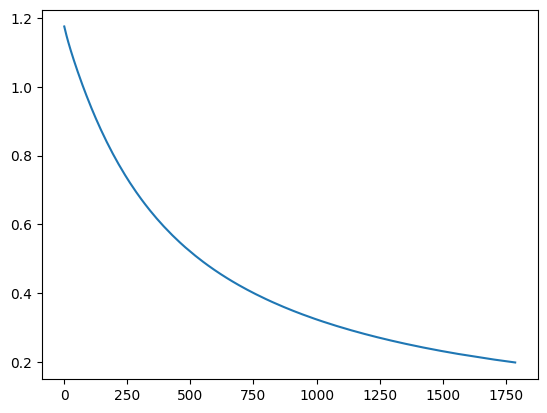

In [13]:
def get_x2(X):
    X2 = np.zeros((X.shape[0], 1))
    for n in range(X.shape[0]):
        diff = angle_diff(X[n, 0], X[n, 1])
        X2[n] = diff
    print(X2.shape, X2.min(), X2.max())
    return X2
X_train2 = get_x2(X_train)
X_test2 = get_x2(X_test)
mlp2 = MLPClassifier(hidden_layer_sizes=(), max_iter=max_iters, early_stopping=False)
mlp2.fit(X_train2, Y_train)
P_train2 = mlp2.predict(X_train2)
P_test2 = mlp2.predict(X_test2)
print(accuracy_score(P_train2, Y_train), accuracy_score(P_test2, Y_test))
iters2 = [i+1 for i in range(len(mlp2.loss_curve_))]
plt.plot(iters2, mlp2.loss_curve_)

0.997 0.99


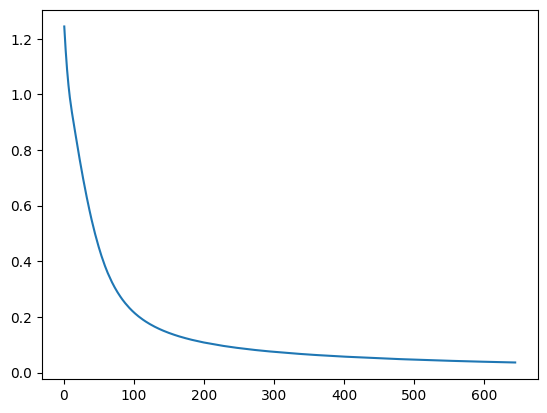

In [12]:
mlp2 = MLPClassifier(hidden_layer_sizes=(64), max_iter=max_iters, early_stopping=False)
mlp2.fit(X_train2, Y_train)
P_train2 = mlp2.predict(X_train2)
P_test2 = mlp2.predict(X_test2)
print(accuracy_score(P_train2, Y_train), accuracy_score(P_test2, Y_test))
iters2 = [i+1 for i in range(len(mlp2.loss_curve_))]
plt.plot(iters2, mlp2.loss_curve_)

0.998 1.0


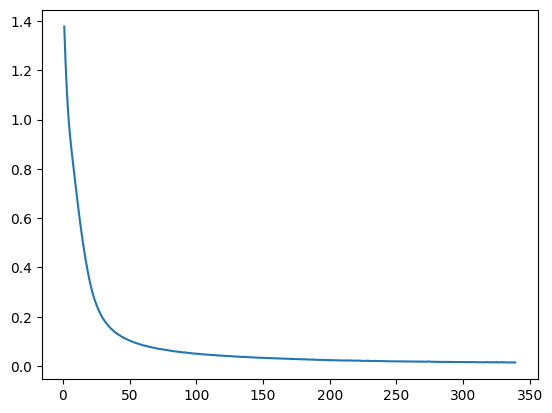

In [17]:
mlp2 = MLPClassifier(hidden_layer_sizes=(64,64), max_iter=max_iters, early_stopping=False)
mlp2.fit(X_train2, Y_train)
P_train2 = mlp2.predict(X_train2)
P_test2 = mlp2.predict(X_test2)
print(accuracy_score(P_train2, Y_train), accuracy_score(P_test2, Y_test))
iters2 = [i+1 for i in range(len(mlp2.loss_curve_))]
plt.plot(iters2, mlp2.loss_curve_)

In [10]:
a1 = 45 
a2 = -170
a = a1 - a2
a = (a + 180) % 360 - 180
a

-145

In [12]:
import math
a1 = math.radians(-45) 
a2 = math.radians(170)
a = a2 - a1
a = (a + math.pi) % (2*math.pi) - math.pi
math.degrees(a)

-145.0

# Observation space debugging

In [1]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt

In [2]:
directory = 'temp/observations/'
files = os.listdir(directory)
np.set_printoptions(precision=2)
observations = {}
for file in files:
    observation = np.load(directory + file)
    observation_name = file.split('.')[0]
    observations[observation_name] = observation
    print(observation_name)
    print(observation)

I1001_I994_I987_I980
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 47  46  46 ...  46  46  47]
  [ 46  45  45 ...  45  45  46]
  [ 45  44  44 ...  44  44  45]]

 [[255 255 255 ... 255 255 124]
  [255 255 255 ... 132 123 123]
  [255 255 255 ... 123 123 123]
  ...
  [ 47  47  46 ...  46  47  47]
  [ 46  46  45 ...  45  46  46]
  [ 45  45  44 ...  44  45  45]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 44  43  43 ...  47  47  48]
  [ 43  42  42 ...  46  46  47]
  [ 42  42  41 ...  45  45  46]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 45  44  44 ...  44  44  45]
  [ 44  44  43 ...  43  44  44]
  [ 43  43  42 ...  42  43  43]]]
I1008_I1001_I994_I987
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 45  45  45 ...  45  45  45]
  [ 45  44  44 ...  44 

I245_I238_I231_I224
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 56  55  55 ...  55  55  56]
  [ 55  54  54 ...  54  54  55]
  [ 54  53  53 ...  53  53  54]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 54  53  53 ...  53  53  54]
  [ 53  52  52 ...  52  52  53]
  [ 52  51  51 ...  51  51  52]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 52  51  51 ...  51  51  52]
  [ 51  50  50 ...  50  50  51]
  [ 50  49  49 ...  49  49  50]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 50  50  49 ...  49  49  50]
  [ 49  48  48 ...  48  48  49]
  [ 48  48  47 ...  47  48  48]]]
I252
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 35  35  35 ...  35  35  35]
  [ 35  34  34 ...  34  34  35]
  [ 34  3

I42_I35_I28_I21
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 46  45  45 ...  45  45  46]
  [ 45  44  44 ...  44  44  45]
  [ 44  43  43 ...  43  43  44]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 46  45  45 ...  45  45  46]
  [ 45  44  44 ...  44  44  45]
  [ 44  43  43 ...  43  43  44]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 46  45  45 ...  45  45  46]
  [ 45  44  44 ...  44  44  45]
  [ 44  44  43 ...  43  44  44]]

 [[117 117 117 ... 255 255 255]
  [116 117 117 ... 255 255 255]
  [115 116 116 ... 255 255 255]
  ...
  [ 46  45  45 ...  45  45  46]
  [ 45  44  44 ...  44  44  45]
  [ 44  44  43 ...  43  44  44]]]
I434_I427_I420_I413
[[[255 255 255 ... 117 118 118]
  [255 255 255 ... 117 117 117]
  [255 255 255 ... 117 117 117]
  ...
  [ 50  50  49 ...  49  50  50]
  [ 49  49  48 ...  48  49  49

I658_I651_I644_I637
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 46  45  45 ...  45  45  46]
  [ 45  44  44 ...  44  44  45]
  [ 44  44  43 ...  43  44  44]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 46  45  45 ...  45  45  46]
  [ 45  44  44 ...  44  44  45]
  [ 44  44  43 ...  43  44  44]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 46  46  45 ...  45  46  46]
  [ 45  45  44 ...  44  45  45]
  [ 44  44  43 ...  43  44  44]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 35  34  34 ...  34  34  35]
  [ 34  34  33 ...  33  34  34]
  [ 33  33  33 ...  33  33  33]]]
I665_I658_I651_I644
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 45  44  44 ...  44  44  45]
  [ 44  43  43 ...  43  43

I868
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 35  34  34 ...  34  34  35]
  [ 34  34  33 ...  33  34  34]
  [ 33  33  33 ...  33  33  33]]

 [[ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]
  ...
  [ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]]

 [[ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]
  ...
  [ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]]

 [[ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]
  ...
  [ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]
  [ -1  -1  -1 ...  -1  -1  -1]]]
I875_I868
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [ 48  47  47 ...  47  47  48]
  [ 47  46  46 ...  46  46  47]
  [ 46  45  45 ... 

V169_V170_V171_V172_V173_V174
[ 0.5   0.5   0.49  0.87  0.32  0.68  0.49  0.87  0.32  0.68  0.5   0.75
  0.5  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.  ]
V176_V177_V178_V179_V180_V181_V169_V170_V171_V172_V173_V174
[ 0.5   0.5   0.49  0.93  0.32  0.68  0.49  0.87  0.32  0.68  0.5   0.75
  0.44  0.5   0.5   0.49  0.87  0.32  0.68  0.49  0.87  0.32  0.68  0.5
  0.75  0.5  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.  ]
V183_V184_V185_V186_V187_V188_V176_V177_V178_V179_V180_V181_V169_V170_V171_V172_V173_V174
[ 0.5   0.5   0.49  1.    0.32  0.68  0.49  0.87  0.32  0.68  0.5   0.75
  0.38  0.5   0.5   0.49  0.93  0.32  0.68  0.49  0.87  0.32  0.68  0.5
  0.75  0.44  0.5   0.5   0.49  0.87  0.32  0.68  

V442_V443_V444_V445_V446_V447_V435_V436_V437_V438_V439_V440_V428_V429_V430_V431_V432_V433_V421_V422_V423_V424_V425_V426
[0.51 0.51 0.48 0.5  0.75 0.52 0.49 0.51 0.74 0.51 0.51 0.74 0.51 0.5
 0.51 0.48 0.49 0.75 0.52 0.49 0.51 0.74 0.51 0.51 0.74 0.52 0.5  0.51
 0.48 0.41 0.75 0.52 0.49 0.51 0.74 0.51 0.51 0.74 0.59 0.5  0.51 0.48
 0.32 0.75 0.52 0.49 0.51 0.74 0.51 0.51 0.74 0.68]
V449_V450_V451_V452_V453_V454_V442_V443_V444_V445_V446_V447_V435_V436_V437_V438_V439_V440_V428_V429_V430_V431_V432_V433
[0.51 0.51 0.48 0.61 0.75 0.52 0.49 0.51 0.74 0.51 0.51 0.74 0.4  0.51
 0.51 0.48 0.5  0.75 0.52 0.49 0.51 0.74 0.51 0.51 0.74 0.51 0.5  0.51
 0.48 0.49 0.75 0.52 0.49 0.51 0.74 0.51 0.51 0.74 0.52 0.5  0.51 0.48
 0.41 0.75 0.52 0.49 0.51 0.74 0.51 0.51 0.74 0.59]
V456_V457_V458_V459_V460_V461_V449_V450_V451_V452_V453_V454_V442_V443_V444_V445_V446_V447_V435_V436_V437_V438_V439_V440
[0.51 0.51 0.48 0.63 0.75 0.52 0.49 0.51 0.73 0.5  0.51 0.73 0.37 0.51
 0.51 0.48 0.61 0.75 0.52 0.49 0.51 0.74

V673_V674_V675_V676_V677_V678_V666_V667_V668_V669_V670_V671_V659_V660_V661_V662_V663_V664_V652_V653_V654_V655_V656_V657
[0.48 0.5  0.49 0.91 0.72 0.56 0.49 0.54 0.75 0.56 0.5  0.76 0.13 0.48
 0.5  0.49 0.86 0.72 0.56 0.49 0.54 0.75 0.56 0.5  0.76 0.18 0.48 0.5
 0.49 0.92 0.72 0.56 0.49 0.54 0.75 0.56 0.5  0.75 0.12 0.48 0.49 0.49
 0.94 0.72 0.56 0.49 0.54 0.74 0.57 0.5  0.75 0.11]
V680_V681_V682_V683_V684_V685_V673_V674_V675_V676_V677_V678_V666_V667_V668_V669_V670_V671_V659_V660_V661_V662_V663_V664
[0.48 0.5  0.49 0.81 0.72 0.56 0.49 0.54 0.75 0.56 0.5  0.76 0.24 0.48
 0.5  0.49 0.91 0.72 0.56 0.49 0.54 0.75 0.56 0.5  0.76 0.13 0.48 0.5
 0.49 0.86 0.72 0.56 0.49 0.54 0.75 0.56 0.5  0.76 0.18 0.48 0.5  0.49
 0.92 0.72 0.56 0.49 0.54 0.75 0.56 0.5  0.75 0.12]
V687_V688_V689_V690_V691_V692_V680_V681_V682_V683_V684_V685_V673_V674_V675_V676_V677_V678_V666_V667_V668_V669_V670_V671
[0.47 0.5  0.49 0.79 0.72 0.56 0.49 0.54 0.75 0.56 0.5  0.76 0.25 0.48
 0.5  0.49 0.81 0.72 0.56 0.49 0.54 0.75 

V897_V898_V899_V900_V901_V902_V890_V891_V892_V893_V894_V895_V883_V884_V885_V886_V887_V888_V876_V877_V878_V879_V880_V881
[0.5  0.48 0.49 0.18 0.49 0.73 0.49 0.76 0.49 0.75 0.5  0.75 0.08 0.5
 0.48 0.49 0.3  0.49 0.73 0.49 0.76 0.49 0.75 0.5  0.75 0.96 0.5  0.48
 0.49 0.37 0.49 0.73 0.49 0.76 0.49 0.75 0.5  0.75 0.89 0.5  0.48 0.49
 0.44 0.49 0.73 0.49 0.76 0.49 0.75 0.5  0.75 0.82]
V8_V9_V10_V11_V12_V13_V1_V2_V3_V4_V5_V6
[ 0.5   0.5   0.49  0.56  0.75  0.5   0.49  0.5   0.75  0.5   0.5   0.75
  0.44  0.5   0.5   0.49  0.5   0.75  0.5   0.49  0.5   0.75  0.5   0.5
  0.75  0.5  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.  ]
V904_V905_V906_V907_V908_V909_V897_V898_V899_V900_V901_V902_V890_V891_V892_V893_V894_V895_V883_V884_V885_V886_V887_V888
[0.5  0.48 0.49 0.05 0.49 0.73 0.49 0.76 0.49 0.75 0.5  0.75 0.21 0.5
 0.48 0.49 0.18 0.49 0.73 0.49 0.76 0.49 0.75 0.5  0.75 0.08 0.5  0.48
 0

In [3]:
def process_episodes(json_evaluation):
    nEpisodes = len(json_evaluation) - 1
    episodes = [None] * nEpisodes
    for episode_str in json_evaluation:
        if 'episode_' not in episode_str:
            continue
        episode_num = int(episode_str.split('_')[1])
        json_episode = json_evaluation[episode_str]
        nSteps = len(json_episode)
        states = [None] * nSteps
        for step_str in json_episode:
            step_num = int(step_str.split('_')[1]) - 1
            state = json_episode[step_str]
            states[step_num] = state
        episodes[episode_num] = states
    return episodes
def read_evaluations(evaluation_folder):
    evaluation_files = [file for file in os.listdir(evaluation_folder)]
    nEvaluations = len(evaluation_files)
    evaluations = [None] * nEvaluations
    for evaluation_file in evaluation_files:
        if '.json' not in evaluation_file:
            continue
        evaluation_number = int(evaluation_file.split('.')[0].split('_')[1])
        json_evaluation = json.load(open(evaluation_folder + evaluation_file, 'r'))
        episodes = process_episodes(json_evaluation)
        evaluations[evaluation_number] = episodes
    return evaluations

episode 0 ...


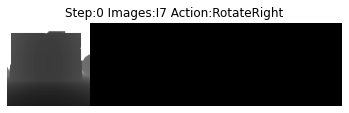

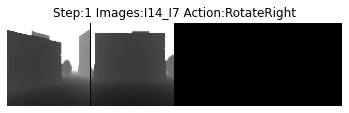

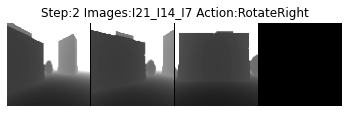

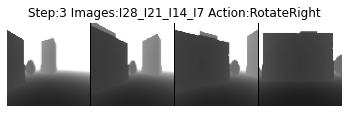

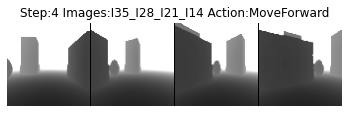

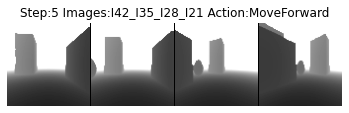

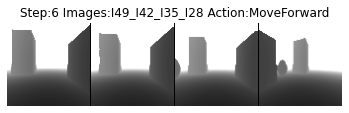

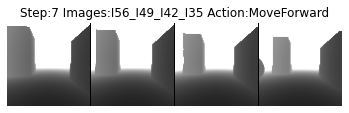

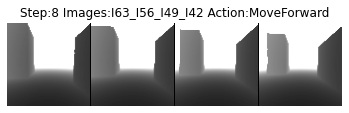

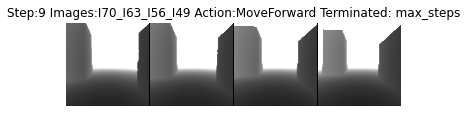

episode 1 ...


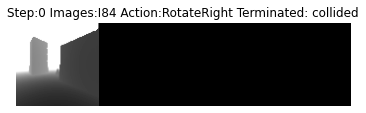

episode 2 ...


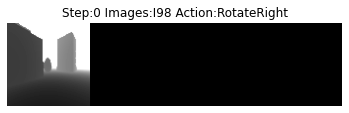

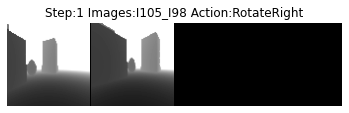

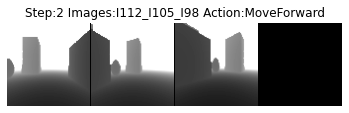

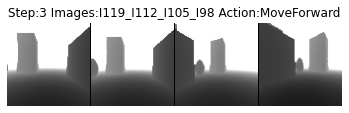

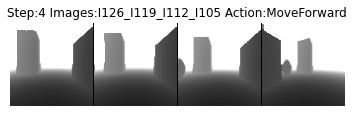

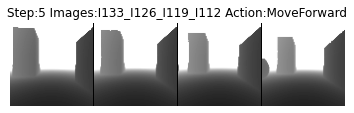

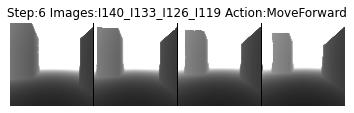

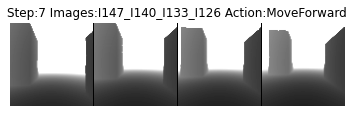

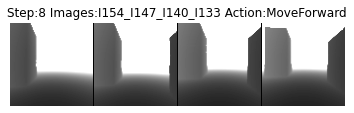

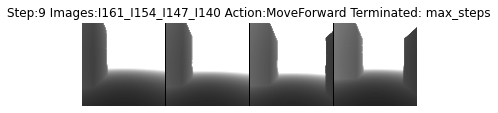

episode 3 ...


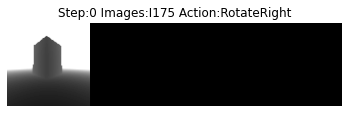

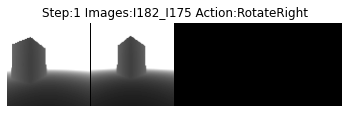

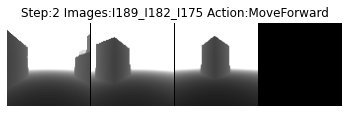

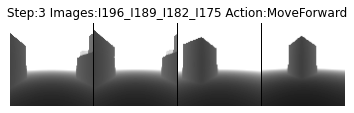

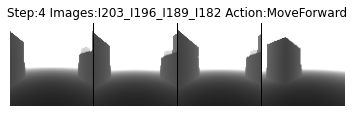

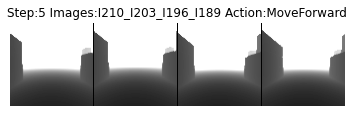

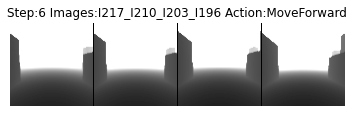

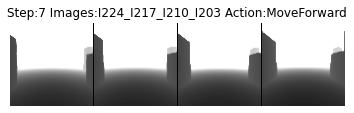

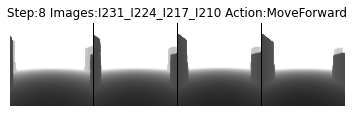

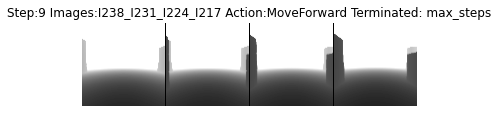

episode 4 ...


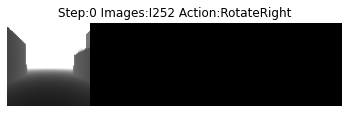

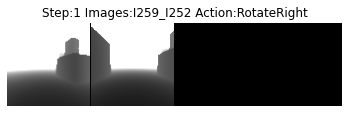

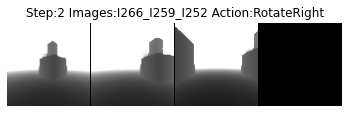

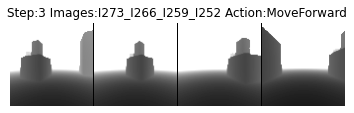

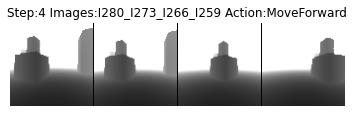

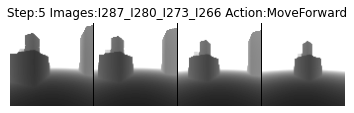

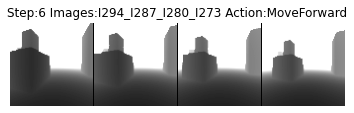

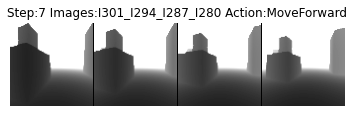

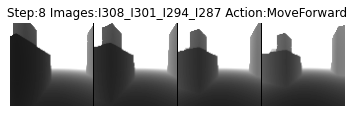

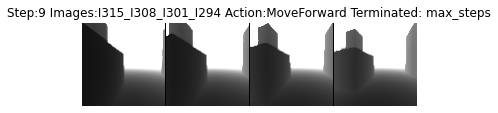

episode 5 ...


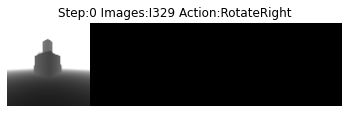

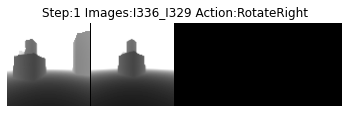

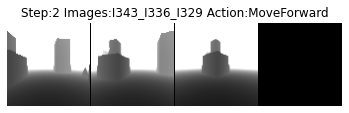

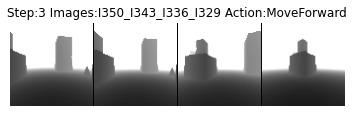

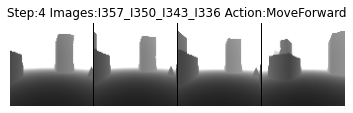

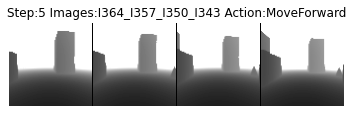

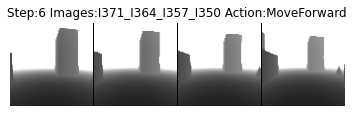

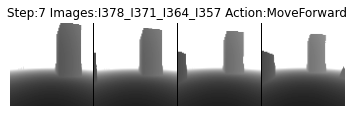

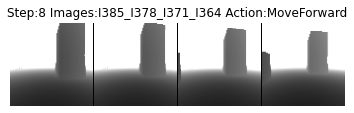

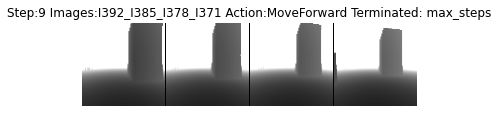

In [6]:
directory = 'local/runs/alpha2/timsurface/evaluations/'
evaluations = read_evaluations(directory)
for evaluation, episodes in enumerate(evaluations):
    for episode, states in enumerate(episodes):
        print('episode', episode, '...')
        for step, state in enumerate(states):
            observation_component = state['observation_component']
            transcribed_action = state['transcribed_action']
            done = state['done']
            if done:
                termination_reason = state['termination_reason']
            observation_name = observation_component.split('__')[1]
            observation = observations[observation_name]
            nBands = observation.shape[0]
            nRows = observation.shape[1]
            nCols = observation.shape[2]
            view_shape = (nRows, nBands * nCols + nBands - 1)
            side_by_side = np.zeros(view_shape, dtype=np.int16)
            side_by_side
            for band in range(nBands):
                side_by_side[0:nRows, (band*nCols+band):(band*nCols+band)+nCols] = observation[band]
            plt.imshow(side_by_side, cmap='gray')
            plt.axis('off')
            title = 'Step:' + str(step) + ' Images:' + observation_name + ' Action:' + transcribed_action
            title += '' if not done else ' Terminated: ' + termination_reason
            plt.title(title)
            plt.show()

In [1]:
import os
import json

In [2]:
directory = 'temp/states/'
files = os.listdir(directory)
episodes = {'train':{}, 'evaluate':{}}
states = {'train':{}, 'evaluate':{}}
for idx, file in enumerate(files):
    if '.json' not in file:
        continue
    state = json.load(open(directory + file, 'r'))
    parts = file.split('.')[0].split('_')
    env = parts[0]
    episode = int(parts[1].replace('episode', ''))
    if episode not in episodes[env]:
        episodes[env][episode] = []
        states[env][episode] = {}
    step = int(parts[2].replace('step', ''))
    episodes[env][episode].append(step)
    states[env][episode][step] = state
for env in ['train', 'evaluate']:
    for episode in episodes[env]:
        episodes[env][episode].sort()
        if len(episodes[env][episode]) <= 2:
            print('BUG DETECTED:', env, episode)
            for step in episodes[env][episode]:
                print(states[env][episode][step])

BUG DETECTED: evaluate 1
{'nSteps': 0, 'drone_position': [0.0, 0.0, 0.6713207364082336], 'yaw': -0.7853980297560242, 'goal_position': [70.7106802532128, -70.71067598409664, -4.003014087677002]}
{'rl_output': 0, 'nSteps': 1, 'transcribed_action': 'MoveForward', 'observation_component': 'V78_V79_V80_V81_V82_V83__I84', 'drone_position': [0.0, 0.0, 0.6713207364082336], 'yaw': -0.7853980297560242, 'goal_position': [70.7106802532128, -70.71067598409664, -4.003014087677002], 'has_collided': True, 'reward_from_AvoidReward': -10, 'reward_from_GoalReward': 0.0, 'total_reward': -10.0, 'termination_reason': 'collided', 'termination_result': 'failure', 'done': True}


In [9]:
directory = 'local/results/alpha/mlserver2019/evaluations/'
evaluations = read_evaluations(directory)
for evaluation, episodes in enumerate(evaluations):
    for episode, states in enumerate(episodes):
        #print('episode', episode, '...')
        for step, state in enumerate(states):
            done = state['done']
            if done and step <= 1:
                print('BUG DETECTED:', evaluation, episode)
                print(state)

BUG DETECTED: 10 3
{'rl_output': 0, 'nSteps': 1, 'transcribed_action': 'MoveForward', 'observation_component': 'V467860_V467861_V467862_V467863_V467864_V467865_V467867_V467868_V467869_V467870_V467871_V467872_I467866_I467873', 'drone_position': [-2.580078601837158, -2.1099143028259277, 0.4709587097167969], 'yaw': -2.910401993777904, 'has_collided': True, 'reward_from_AvoidReward': -10, 'reward_from_GoalReward': -0.0018998303285945317, 'total_reward': -10.001899830328595, 'termination_reason': 'collided', 'termination_result': 'failure', 'done': True}


# FUTURE REWARDS

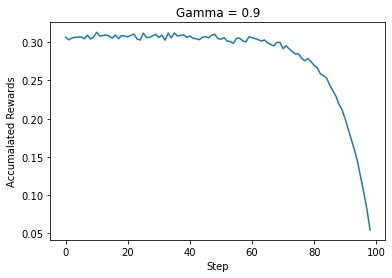

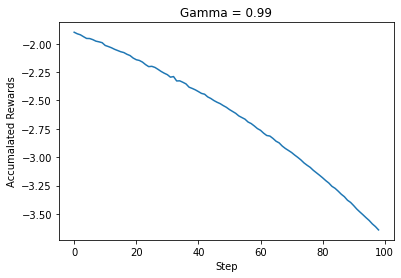

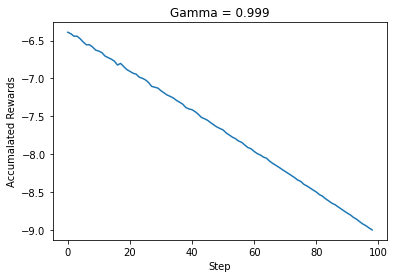

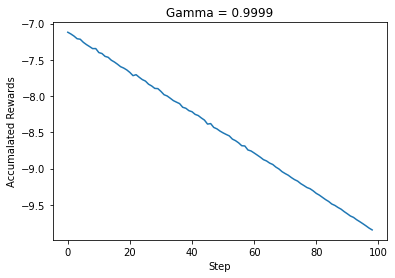

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sample_reward(mean_reward, dev_reward):
    return np.random.normal(loc=mean_reward, scale=dev_reward, size=None)

for gamma in [0.9, 0.99, 0.999, 0.9999]:
    mean_reward = 0.02
    dev_reward = 0.001
    rs = []
    for n in range(99):
        r = sample_reward(mean_reward, dev_reward)
        for n in range(99-n):
            r += (gamma**n) * sample_reward(mean_reward, dev_reward)
        r += (gamma**99) * (-10)
        rs.append(r)
    plt.title('Gamma = ' + str(gamma))
    plt.xlabel('Step')
    plt.ylabel('Accumalated Rewards')
    plt.plot(rs)
    plt.show()

# Tensorboard

In [ ]:
'''
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd


def parse_tensorboard(path, scalars):
    """returns a dictionary of pandas dataframes for each requested scalar"""
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 0},
    )
    _absorb_print = ea.Reload()
    # make sure the scalars are in the event accumulator tags
    assert all(
        s in ea.Tags()["scalars"] for s in scalars
    ), "some scalars were not found in the event accumulator"
    return {k: pd.DataFrame(ea.Scalars(k)) for k in scalars}
#parse_tensorboard("local/results/alpha2/mlserver2019/mlserver2019/tensorboard/run_1", ['Loss', 'Epsilon', 'Learning_rate'])
'''

# Benchmarks

In [ ]:
'''
benchmarks_path = ''
benchmarks = json.load(open(benchmarks_path, 'r'))
print('Estimated Time of Completion:', sum(benchmarks['time']['environments.dronerl.reset']) / 1_000_000 / 60 / 60)

def aggregate_time_benchmarks(benchmarks):
    aggregated = {'units':benchmarks['time']['units']}
    for variable_name in benchmarks['time']:
        if variable_name == 'units':
            continue
        if variable_name in ['maps.airsimmap.connect', ]:
            method_name = variable_name
        else:
            method_name = variable_name.split('.')[-1]
        if method_name not in aggregated:
            aggregated[method_name] = []
        aggregated[method_name] = aggregated[method_name] + benchmarks['time'][variable_name]
    return aggregated
def aggregate_memory_benchmarks(benchmarks):
    aggregated = {'units':benchmarks['memory']['units']}
    for variable_name in benchmarks['memory']:
        if variable_name == 'units':
            continue
        class_name = variable_name.split('_')[0]
        if class_name not in aggregated:
            aggregated[class_name] = []
        aggregated[class_name] = aggregated[class_name] + benchmarks['memory'][variable_name]
    return aggregated
def visualize_benchmarks(benchmarks):
    for metric_name in benchmarks:
        units = benchmarks[metric_name]['units']
        for variable_name in benchmarks[metric_name]:
            if variable_name in ['units', 'memory']:
                continue
            measurements = benchmarks[metric_name][variable_name]
            plt.hist(measurements, 10)
            plt.xlabel(metric_name + ' [' + units + ']')
            plt.ylabel('Bin Count')
            plt.title(variable_name)
            plt.show()
benchmarks['time'] = aggregate_time_benchmarks(benchmarks)
#benchmarks['memory'] = aggregate_memory_benchmarks(benchmarks)
visualize_benchmarks(benchmarks)
'''

# Map Objectives

In [ ]:
'''
# plot phase blocks environment map
name='Learning Environment (to scale)'

object_color = color_blinds['blue']
train_spawn_color = color_blinds['red']
train_goal_color = color_blinds['orange']
eval_spawn_color = color_blinds['pink']
eval_goal_color = color_blinds['purple']
drone_radius = 0.5
goal_tolerance = 4
goal_distance = 20

# set training spawns and goals
x_min = -16
x_max = 6
y_min = -12
y_max = 12
yaw_min = 0
yaw_max = 360
training_spawns = []
training_goals = []
for x in np.arange(x_min, x_max + drone_radius, drone_radius):
    for y in np.arange(y_min, y_max + drone_radius, drone_radius):
        training_spawns.append([y, x])
        training_goals.append([yaw_min, yaw_max])
        
# set evaluation spawns and goals
evaluation_vecs = [
    [0,0,math.radians(0)],
    [0,0,math.radians(135)],
    [0,0,math.radians(180)],
    [0,0,math.radians(230)],
]
evaluation_spawns = []
evaluation_goals = []
for eval_vec in evaluation_vecs:
    x = eval_vec[0]
    y = eval_vec[1]
    yaw = eval_vec[2]
    evaluation_spawns.append([y, x])
    goal_x = goal_distance * math.cos(yaw)
    goal_y = goal_distance * math.sin(yaw)
    evaluation_goals.append([goal_y, goal_x])
    
# make plot
plot_environment(name)

# plot training spawns and goals
plot_spawns_goals(
    drone_radius = drone_radius,
    goal_tolerance = goal_tolerance,
    goal_distance = goal_distance,
    spawns = training_spawns,
    goals = training_goals,
    spawn_color = train_spawn_color,
    goal_color = train_goal_color,
    goal_wedge = True,
)

# plot map objects
plot_map(object_color)

# plot evaluation  spawns and goals
'''
plot_spawns_goals(
    drone_radius = drone_radius,
    goal_tolerance = goal_tolerance,
    goal_distance = goal_distance,
    spawns = evaluation_spawns,
    goals = evaluation_goals,
    spawn_color = eval_spawn_color,
    goal_color = eval_goal_color,
    goal_wedge = False,
)
'''

# show all
plt.show()
'''